In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt

In [15]:
# Paso 1: Definir la semilla
seed = 3915

valhalla_data = pd.read_csv("Valhalla23.csv")

# Separar características y variable objetivo
X = valhalla_data[['Celsius']]
y = valhalla_data['Valks']

In [16]:
# Paso 2: Dividir el conjunto de datos en entrenamiento (40%), validación (40%), y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=seed)

In [24]:
# Paso 3: Entrenar un modelo base con SGDRegressor
model_base = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)
model_base.fit(X_train, y_train)

# Predecir en los conjuntos de entrenamiento, validación, y prueba
y_train_pred = model_base.predict(X_train)
y_val_pred = model_base.predict(X_val)
y_test_pred = model_base.predict(X_test)

# Calcular el error cuadrático medio
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Imprimir los resultados
mse_train, mse_val, mse_test

(896.7827483738962, 1143.3637055396787, 1298.153749200131)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


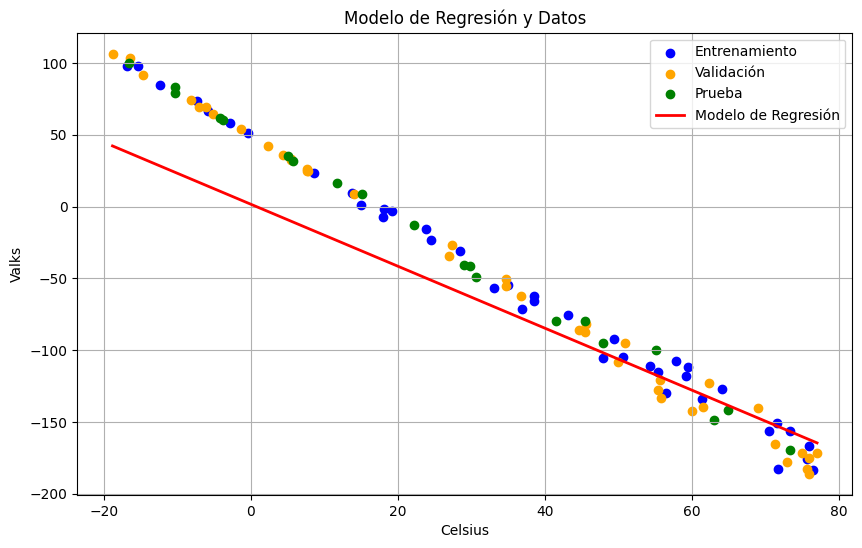

In [19]:
# Paso 4: Graficar el modelo y los subconjuntos de datos
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_val, y_val, color='orange', label='Validación')
plt.scatter(X_test, y_test, color='green', label='Prueba')

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred_line = model_base.predict(X_range)
plt.plot(X_range, y_pred_line, color='red', linewidth=2, label='Modelo de Regresión')

plt.title('Modelo de Regresión y Datos')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Paso 5: Crear una lista con 20 elementos entre 2 y 39 (sin repetición)
random.seed(seed)
subset_sizes = random.sample(range(3, 40), 19)  # 19 valores entre 3 y 39
subset_sizes.append(2)  # Agregar el número 2
subset_sizes.sort()  # Ordenar la lista

In [21]:
# Paso 6: Entrenar 100 modelos para cada tamaño de subconjunto
avg_mse_train_list = []
avg_mse_val_list = []

for size in subset_sizes:
    mse_train_repeats = []
    mse_val_repeats = []

    for _ in range(100):
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=random.randint(0, 10000))
        model = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)
        model.fit(X_train_subset, y_train_subset)

        y_train_pred_subset = model.predict(X_train_subset)
        y_val_pred_subset = model.predict(X_val)

        mse_train_repeats.append(mean_squared_error(y_train_subset, y_train_pred_subset))
        mse_val_repeats.append(mean_squared_error(y_val, y_val_pred_subset))

    avg_mse_train_list.append(np.mean(mse_train_repeats))
    avg_mse_val_list.append(np.mean(mse_val_repeats))

# Agregar los errores de la línea base
avg_mse_train_list.append(mse_train)
avg_mse_val_list.append(mse_val)

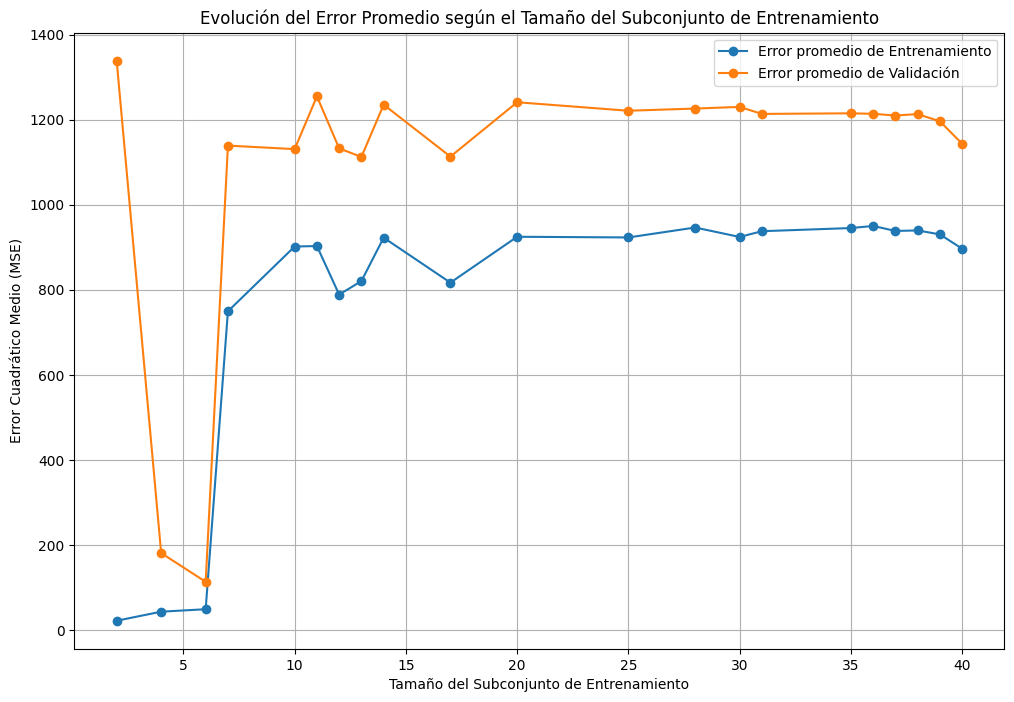

In [22]:
# Paso 7: Graficar la evolución del error promedio
subset_sizes_with_base = subset_sizes + [X_train.shape[0]]

plt.figure(figsize=(12, 8))
plt.plot(subset_sizes_with_base, avg_mse_train_list, label='Error promedio de Entrenamiento', marker='o')
plt.plot(subset_sizes_with_base, avg_mse_val_list, label='Error promedio de Validación', marker='o')

plt.title('Evolución del Error Promedio según el Tamaño del Subconjunto de Entrenamiento')
plt.xlabel('Tamaño del Subconjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Paso 8: Entrenar un nuevo modelo utilizando la cantidad adecuada de muestras (39)
X_train_final, _, y_train_final, _ = train_test_split(X_train, y_train, train_size=39, random_state=seed)
model_final = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)
model_final.fit(X_train_final, y_train_final)

y_train_final_pred = model_final.predict(X_train_final)
y_val_final_pred = model_final.predict(X_val)
y_test_final_pred = model_final.predict(X_test)

mse_train_final = mean_squared_error(y_train_final, y_train_final_pred)
mse_val_final = mean_squared_error(y_val_final_pred, y_val)
mse_test_final = mean_squared_error(y_test_final_pred, y_test)

# Resultados finales
mse_train_final, mse_val_final, mse_test_final

(844.8423449963491, 1170.8654686962705, 1327.7839907749153)

Paso 8: Análisis de resultados

Modelo entrenado con 2 muestras: Muestra un error de entrenamiento bajo debido al sobreajuste, ya que se ajusta a un subconjunto muy pequeño de los datos. Sin embargo, el error de validación es bastante alto, lo que indica un modelo con alto sesgo y varianza, debido a la falta de generalización.

Modelo entrenado con 40 muestras: El modelo final tiene un error de entrenamiento más alto que el modelo con 2 muestras, pero el error de validación es mucho menor, lo que sugiere un mejor equilibrio entre sesgo y varianza, y por lo tanto, mejor capacidad de generalización.

A medida que se incrementa el número de muestras en el entrenamiento, el modelo tiende a mejorar su capacidad de generalización, reduciendo el error de validación, aunque el error de entrenamiento tiende a aumentar ligeramente, lo que indica una reducción del sobreajuste.

Paso 9: Selección de la cantidad adecuada de muestras para el entrenamiento

A partir de la gráfica, la cantidad de muestras más adecuada parece estar en el rango de 35 a 40, ya que en este rango, el error de validación es relativamente bajo y estable.

Los errores cuadráticos medios (MSE) para el modelo entrenado con 39 muestras son los siguientes:

Entrenamiento: 844.84

Validación: 1170.87

Prueba: 1327.78

Paso 10: Comparación con la línea base

Comparando estos resultados con los errores obtenidos para la línea base:

Entrenamiento (Línea base vs Modelo con 39 muestras): 896.78 vs 844.84

Validación (Línea base vs Modelo con 39 muestras): 1143.36 vs 1170.87

Prueba (Línea base vs Modelo con 39 muestras): 1298.15 vs 1327.78

Paso 11: Analisis Final

Entrenamiento:

El modelo con 39 muestras tiene un error de entrenamiento ligeramente menor que el modelo de línea base, lo que indica un ajuste más preciso a los datos de entrenamiento.

Validación y Prueba:

Aunque los errores de validación y prueba son ligeramente mayores en el modelo con 39 muestras comparado con la línea base, la diferencia no es significativa, y podría deberse a la variabilidad en los datos.